In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [17]:
#1. Import and store the data in a data frame. (3 points)
df= pd.read_csv('air.dat', sep=' ', skipinitialspace=True) #still column names are wrong for that do the next step as shown
df.columns = ['City1' ,'City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare','Low price airline','Market share','price']
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,Market share,price
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69


In [11]:
#2. Remove the outliers from the data (5 points)

#import seaborn as sns
#sns.boxplot(data=df)
#or
#df.boxplot()
#check the outlier using box-whiskers plot. I think matplotlib box plot provides better visualisation for outliers than seaborn.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print (IQR)
df_withoutoutlier=df[~((df.iloc[:,[2,3,4,6,7,9,10]]< (Q1 - 1.5 * IQR)) |(df.iloc[:,[2,3,4,6,7,9,10]] > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Dataset shape before removal of outlier:',df.shape)
print ('Dataset shape After removal of outlier:',df_withoutoutlier.shape)

Average Fare                  71.410
Distance                     901.000
Average weekly passengers    513.150
market share                  27.010
Average fare                  78.985
Market share                  39.760
price                         54.715
dtype: float64
Dataset shape before removal of outlier: (999, 11)
Dataset shape After removal of outlier: (884, 11)


In [12]:
#3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and split the table
df1 = df_withoutoutlier.pop('Average Fare') #take it
df_withoutoutlier['Average Fare']=df1       #and keep it as the last column
independent_var=df_withoutoutlier.iloc[:,:-1]
dependent_var=pd.DataFrame(df_withoutoutlier.iloc[:,len(df_withoutoutlier.columns)-1]) #actually you dont have to convert to dataframe

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
corr_mat=df_withoutoutlier.corr(method='pearson')
print(corr_mat)
values_less=corr_mat[corr_mat['Average Fare']<0.1]
values=values_less.index.values
independent_var.drop(values,axis=1,inplace=True)
independent_var.head()

                           Distance  Average weekly passengers  market share  \
Distance                   1.000000                  -0.129901     -0.547777   
Average weekly passengers -0.129901                   1.000000      0.021900   
market share              -0.547777                   0.021900      1.000000   
Average fare               0.489261                  -0.164077     -0.192970   
Market share              -0.360774                   0.076594      0.280760   
price                      0.539577                  -0.209279     -0.314283   
Average Fare               0.522229                  -0.197354     -0.207560   

                           Average fare  Market share     price  Average Fare  
Distance                       0.489261     -0.360774  0.539577      0.522229  
Average weekly passengers     -0.164077      0.076594 -0.209279     -0.197354  
market share                  -0.192970      0.280760 -0.314283     -0.207560  
Average fare                   1.000000

,City1,City2,Distance,market leading airline,Average fare,Low price airline,price
0,CAK,MCO,860,FL,123.09,DL,118.94
1,ALB,ATL,852,DL,223.98,CO,167.12
2,ALB,BWI,288,WN,68.86,WN,68.86
3,ALB,ORD,723,UA,161.36,WN,145.42
4,ALB,FLL,1204,WN,137.97,DL,127.69


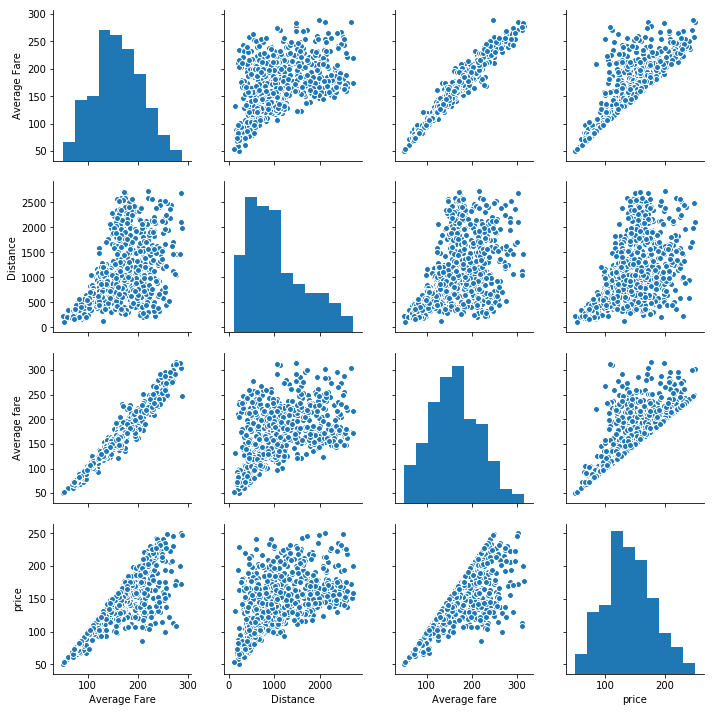

In [14]:
#5. Create scatter Plot of Independent Variable vs Dependent Variable. (4 points)
scatter_mattrix=pd.concat([dependent_var,independent_var],axis=1)
sns.pairplot(scatter_mattrix)

In [15]:
#6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(independent_var.iloc[:,[2,4,6]], dependent_var, test_size=0.2,random_state=10)
print ('X_train {}, \n y_train {}'.format(X_train.head(),y_train.head()))
print ('--------------------------------------------------------------------------------------------------')
print ('X_test {},\n y_test {}'.format(X_test.head(),y_test.head()))

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


X_train      Distance  Average fare   price
632       543         91.02   91.02
553      1023        142.69  127.17
208       612        176.40  176.40
210      2105        284.75  176.35
206       496        208.55  123.66, 
 y_train      Average Fare
632         97.89
553        139.98
208        172.27
210        254.38
206        206.06
--------------------------------------------------------------------------------------------------
X_test      Distance  Average fare   price
204       280        214.10  175.75
491      1671        182.87  166.26
314       607        178.39  178.39
461       794        189.66  183.04
407       181         81.91   81.91,
 y_test      Average Fare
204        204.13
491        174.32
314        186.83
461        187.65
407         83.35


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
#7. Print the coefficients & intercepts of the linear regression model (5 points)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#Predict the values
print ('Average Fare Predicted: ',regr.predict([[794,189.66 ,183.04]])) #first value
print ('Actual Average Fare:', y_test.values[3])#corresponding First value

Intercept: 
 [7.05360979]
Coefficients: 
 [[0.00205508 0.76186011 0.19502818]]
Average Fare Predicted:  [[188.87769057]]
Actual Average Fare: [187.65]
